In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pathlib
import matplotlib.pyplot as plt
from remote_sensing_tools.raster_base import RasterBase, QueryParams, LoadParams
from remote_sensing_tools.analyse_aoi import calculate_indicies, calculate_median

## Set up query and load params

In [3]:
# set up AOI and time period
aus_query_params = QueryParams(
    product="Sentinel 2",
    bbox=(145.02, -37.46, 145.00, -37.44),
    start_date="2020-01-01",
    end_date="2020-06-30",
)

# bands and res. used in .id for medians of MSAVI, BAEI, BSI
aus_load_params = LoadParams(
    crs="EPSG:3577",
    resolution=10,
    bands=("blue", "green", "red", "nir", "swir_1", "swir_2", "pq_mask"),
)

## Set up data configuration

In [4]:
# set up path to config file
deaus_config_file = pathlib.Path(
    "../dataset_configuration/digital_earth_australia_stac/digital_earth_australia_stac.toml"
)

## Load using class method

In [5]:
# query data from DE Aus
deaus_stac_raster = RasterBase.from_stac_query(
    configuration_file=deaus_config_file,
    product_code="ga_s2am_ard_3",
    query_params=aus_query_params,
    load_params=aus_load_params,
)

deaus_stac_data = deaus_stac_raster.data.compute()
deaus_stac_data

/Users/madeleineseehaber/anaconda3/envs/remotesensingtools/lib/python3.9/site-packages/rasterio/warp.py:344: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  _reproject(
/Users/madeleineseehaber/anaconda3/envs/remotesensingtools/lib/python3.9/site-packages/rasterio/warp.py:344: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  _reproject(


<xarray.Dataset> Size: 22MB
Dimensions:      (y: 239, x: 200, time: 36)
Coordinates:
  * y            (y) float64 2kB -4.151e+06 -4.151e+06 ... -4.154e+06 -4.154e+06
  * x            (x) float64 2kB 1.154e+06 1.154e+06 ... 1.156e+06 1.156e+06
    spatial_ref  int32 4B 3577
  * time         (time) datetime64[ns] 288B 2020-01-03T00:17:16.694285 ... 20...
Data variables:
    blue         (time, y, x) int16 3MB 479 486 472 477 ... 4564 4374 4319 4232
    green        (time, y, x) int16 3MB 559 572 560 562 ... 4480 4256 4120 4098
    red          (time, y, x) int16 3MB 483 483 485 477 ... 4515 4353 4255 4196
    nir          (time, y, x) int16 3MB 319 316 333 337 ... 5374 5245 5058 5027
    swir_1       (time, y, x) int16 3MB 186 186 356 356 ... 4089 3937 3937 3808
    swir_2       (time, y, x) int16 3MB 140 140 239 239 ... 2909 2806 2806 2731
    pq_mask      (time, y, x) uint8 2MB 5 5 5 5 5 5 1 1 5 ... 2 2 2 2 2 2 2 2 2

## Calculate indicies using EO for .ID method

In this section, we calculate MSAVI, BAEI, BSI and NDWI indicies for our AOI. Once these indicies are calculated, the median values for MSAVI, BAEI and BSI are calcluated and then the maximum values are calculated for NDWI. This analysis uses the same method used in the EO for .ID `analyse_aoi.py` .

In [6]:
data_indicies = calculate_indicies(deaus_stac_data)
data_indicies

<xarray.Dataset> Size: 77MB
Dimensions:      (y: 239, x: 200, time: 36)
Coordinates:
  * y            (y) float64 2kB -4.151e+06 -4.151e+06 ... -4.154e+06 -4.154e+06
  * x            (x) float64 2kB 1.154e+06 1.154e+06 ... 1.156e+06 1.156e+06
    spatial_ref  int32 4B 3577
  * time         (time) datetime64[ns] 288B 2020-01-03T00:17:16.694285 ... 20...
Data variables:
    blue         (time, y, x) int16 3MB 479 486 472 477 ... 4564 4374 4319 4232
    green        (time, y, x) int16 3MB 559 572 560 562 ... 4480 4256 4120 4098
    red          (time, y, x) int16 3MB 483 483 485 477 ... 4515 4353 4255 4196
    nir          (time, y, x) int16 3MB 319 316 333 337 ... 5374 5245 5058 5027
    swir_1       (time, y, x) int16 3MB 186 186 356 356 ... 4089 3937 3937 3808
    swir_2       (time, y, x) int16 3MB 140 140 239 239 ... 2909 2806 2806 2731
    pq_mask      (time, y, x) uint8 2MB 5 5 5 5 5 5 1 1 5 ... 2 2 2 2 2 2 2 2 2
    msavi        (time, y, x) float64 14MB 255.4 269.6 nan ... 5.177e+03 nan nan
    baei         (time, y, x) float64 14MB 0.6487 0.6376 ... 0.5281 0.5308
    bsi          (time, y, x) float64 14MB -0.08793 -0.09041 ... -0.0727
    ndwi         (time, y, x) float64 14MB 0.2733 0.2883 ... -0.1022 -0.1018

In [7]:
data_median = calculate_median(deaus_stac_data, aus_query_params)
data_median

<xarray.Dataset> Size: 2MB
Dimensions:      (y: 239, x: 200)
Coordinates:
  * y            (y) float64 2kB -4.151e+06 -4.151e+06 ... -4.154e+06 -4.154e+06
  * x            (x) float64 2kB 1.154e+06 1.154e+06 ... 1.156e+06 1.156e+06
    spatial_ref  int32 4B 3577
    time         <U10 40B '2020-06-30'
Data variables:
    msavi        (y, x) float64 382kB 2.613e+03 1.086e+03 ... 4.548e+03
    baei         (y, x) float64 382kB 0.5738 0.5883 0.5316 ... 0.4333 0.4359
    bsi          (y, x) float64 382kB -0.09662 -0.0957 ... -0.07423 -0.07441
    ndwi         (y, x) float64 382kB 0.397 0.408 0.3879 ... -0.01123 -0.009234

## Plot indicies 

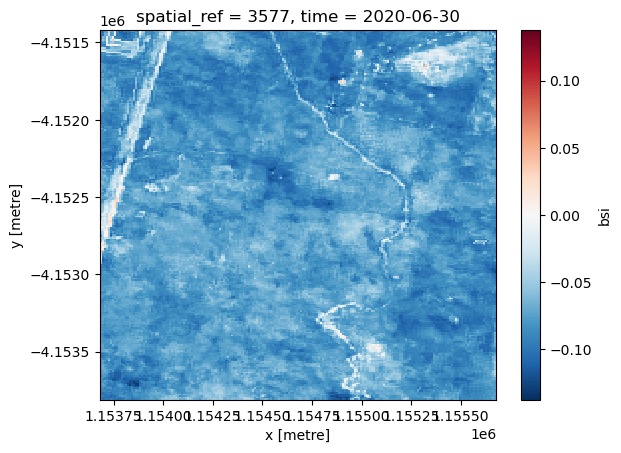

In [14]:
data_median["bsi"].plot()